## Keşifçi Veri Analizi | Becerileri Pekiştirme

Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [2]:
df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

Dataframemimizi görüntüleyelim:

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Veri çerçevesinin son 5 gözlemini inceleyelim

In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Veri çerçevemizden rastgele 10 deeğere göz atalım:

In [6]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,Iris-virginica
70,5.9,3.2,4.8,1.8,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor
30,4.8,3.1,1.6,0.2,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor
122,7.7,2.8,6.7,2.0,Iris-virginica
89,5.5,2.5,4.0,1.3,Iris-versicolor
49,5.0,3.3,1.4,0.2,Iris-setosa
133,6.3,2.8,5.1,1.5,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [7]:
df.shape

(150, 5)

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
df.var()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [11]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.

En güçlü pozitif ilişki hangi iki değişken arasındadır?

In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

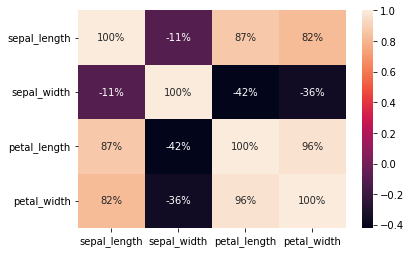

In [13]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='.0%',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.

In [14]:
df["species"].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.

In [15]:
df["species"].nunique() 

3

Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.

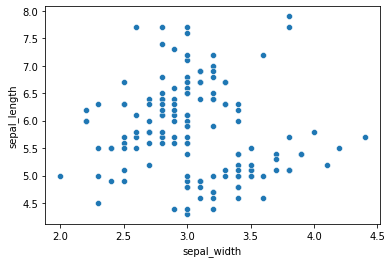

In [16]:
sns.scatterplot(x = "sepal_width", y = "sepal_length",  data = df);

Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim. 

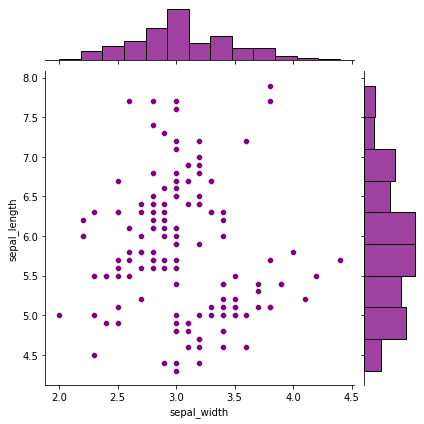

In [17]:
sns.jointplot(x = "sepal_width", y = "sepal_length", data = df, color="purple");

Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "variety" parametresi ile hedef değişkenine göre kırdıralım. 

3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.

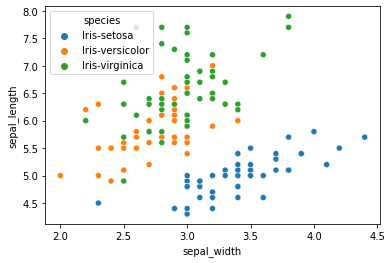

In [18]:
sns.scatterplot(x = "sepal_width", y = "sepal_length", hue = "species", data = df);

3 farklı renk arasında petal değişkenleriyle bir kümeleme yapalım:

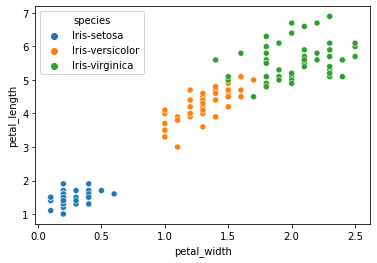

In [19]:
sns.scatterplot(x = "petal_width", y = "petal_length", hue = "species", data = df);

value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım. 

In [20]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin. 

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

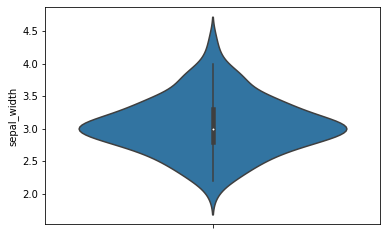

In [21]:
sns.violinplot(y = "sepal_width", data = df);

Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


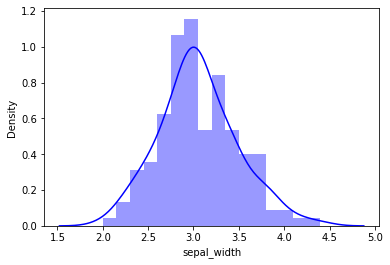

In [22]:
sns.distplot(df["sepal_width"],bins=16, color="blue");

Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

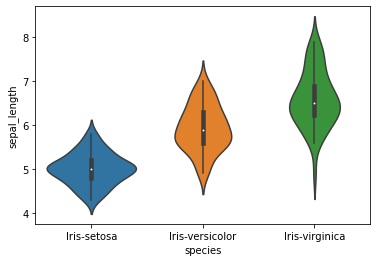

In [23]:
sns.violinplot(x = "species", y = "sepal_length", data = df);

Üç çiçek türü için üç farklı keman grafiğini sepal.width değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

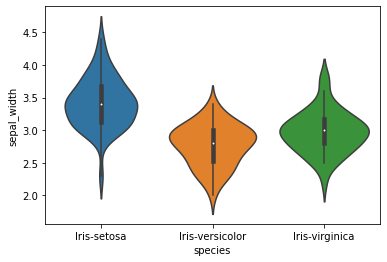

In [24]:
sns.violinplot(x = "species", y = "sepal_width", data = df);

Üç çiçek türü için üç farklı keman grafiğini petal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.


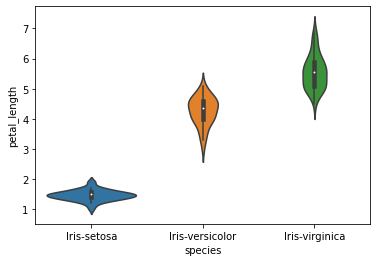

In [25]:
sns.violinplot(x = "species", y = "petal_length", data = df);

Üç çiçek türü için üç farklı keman grafiğini petal.width değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.


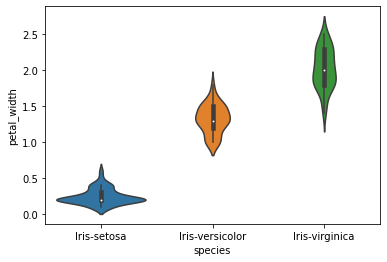

In [26]:
sns.violinplot(x = "species", y = "petal_width", data = df);

Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?

50 x 3 olduğunu ve dengeli olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna variety parametresini vereilm.

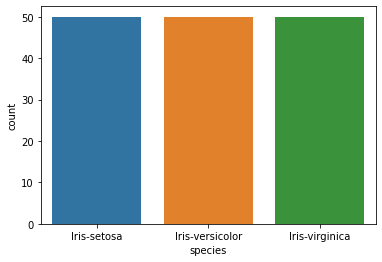

In [27]:
sns.countplot(x = "species", data = df);

sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.

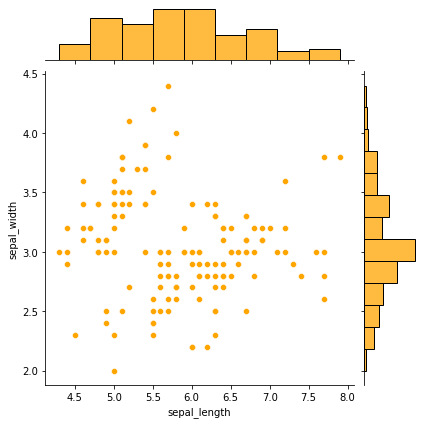

In [28]:
sns.jointplot(x="sepal_length",y="sepal_width",data=df,color="orange");

Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

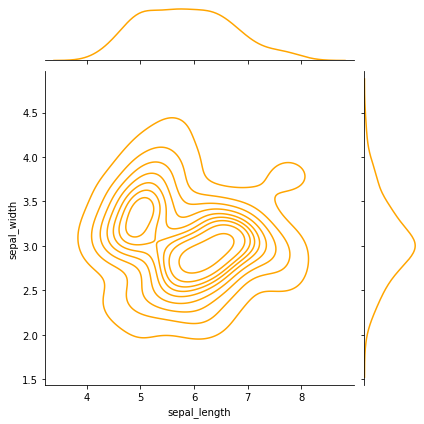

In [29]:
sns.jointplot(x="sepal_length",y="sepal_width",kind="kde",data=df,color="orange");

scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.

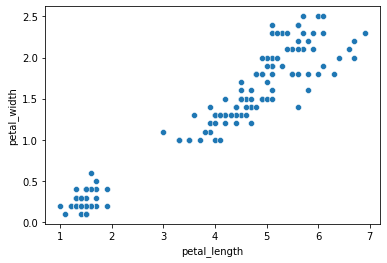

In [30]:
sns.scatterplot(x="petal_length",y="petal_width",data=df);

Aynı görselleştirmeye hue = "variety" parametresini ekleyerek 3. bir boyut verelim.

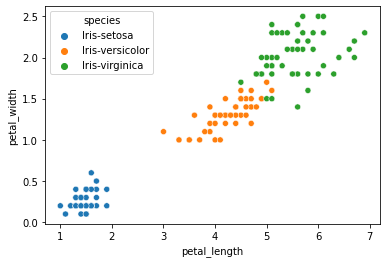

In [31]:
sns.scatterplot(x="petal_length",y="petal_width",hue="species",data=df);

sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim. Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.

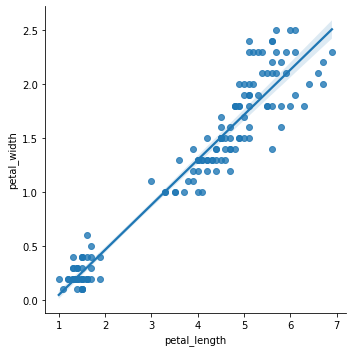

In [32]:
sns.lmplot(x = "petal_length", y = "petal_width", data = df);

Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım. 

In [33]:
df.corr()["petal_length"]["petal_width"]

0.9627570970509662

Aynı değerlendirmeyi sepal_length ve sepal_width değişkenleri için inceleyelim


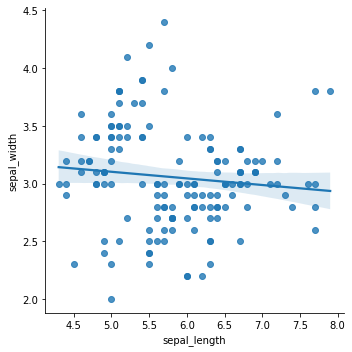

In [34]:
sns.lmplot(x = "sepal_length", y = "sepal_width", data = df);

İki değişken arasındaki korelasyon katsıyısına bakalım.

In [35]:
df.corr()["sepal_length"]["sepal_width"]

-0.10936924995064931

Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.

In [36]:
df["total_length"]=df["petal_length"]+df["sepal_length"]

total.length'in ortalama değerini yazdıralım. 

In [37]:
df["total_length"].mean()

9.602000000000004

total.length'in standart sapma değerini yazdıralım.

In [38]:
df["total_length"].std()

2.5191739884121978

total.length'in maksimum değerini yazdıralım.

In [39]:
df["total_length"].max()

14.600000000000001

Petal Width ile Sepal Width değerlerini toplayarak yeni bir total width özniteliği oluşturalım.

In [40]:
df["total_width"]=df["petal_width"]+df["sepal_width"]

total.width'in ortalama değerini yazdıralım. 

In [41]:
df["total_width"].mean()

4.252666666666665

total.width'in standart sapma değerini yazdıralım.

In [42]:
df["total_width"].std()

0.7310649276306678

total.width'in maksimum değerini yazdıralım.

In [43]:
df["total_width"].max()

6.1

Total length ile Total width değişkeni arasındaki korelasyon grafiğini çizelim

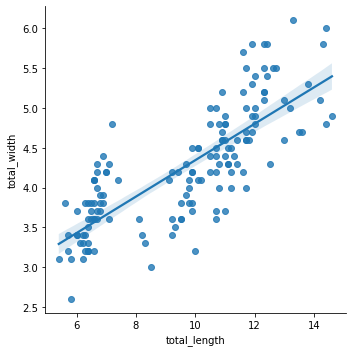

In [44]:
sns.lmplot(x = "total_length", y = "total_width", data = df);

Şimdi de iki değişken arasındaki korelasyon katsıyısını yazdıralım

In [45]:
df.corr()["total_length"]["total_width"]

0.788579049906261

sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.

In [46]:
df[(df['sepal_length']>5.5) & (df['species'] == "Iris-setosa")]


,sepal_length,sepal_width,petal_length,petal_width,species,total_length,total_width
14,5.8,4.0,1.2,0.2,Iris-setosa,7.0,4.2
15,5.7,4.4,1.5,0.4,Iris-setosa,7.2,4.8
18,5.7,3.8,1.7,0.3,Iris-setosa,7.4,4.1


petal.length'i 5'den küçük ve türü virginica olan gözlemlerin sadece sepal.length ve sepal.width değişkenlerini ve değerlerini yazdıralım.

In [47]:
df[(df['petal_length']<5) & (df['species']=="Iris-virginica")].filter(["sepal_length", "sepal_width"])

,sepal_length,sepal_width
106,4.9,2.5
121,5.6,2.8
123,6.3,2.7
126,6.2,2.8
127,6.1,3.0
138,6.0,3.0


Hedef değişkenimiz variety'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.

In [48]:
df.groupby(["species"]).mean()

,sepal_length,sepal_width,petal_length,petal_width,total_length,total_width
species,,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,6.470,3.662
Iris-versicolor,5.936,2.770,4.260,1.326,10.196,4.096
Iris-virginica,6.588,2.974,5.552,2.026,12.140,5.000


Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım. 

In [49]:
df.groupby(["species"])["petal_length"].std()

species
Iris-setosa        0.173511
Iris-versicolor    0.469911
Iris-virginica     0.551895
Name: petal_length, dtype: float64

Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimiz için temel istatistik değerlerini inceleyelim: 


In [50]:
df.groupby(["species"])["petal_length"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.width değişkenimiz için temel istatistik değerlerini inceleyelim: 


In [51]:
df.groupby(["species"])["petal_width"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece sepal.length değişkenimiz için temel istatistik değerlerini inceleyelim: 


In [52]:
df.groupby(["species"])["sepal_length"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece sepal.width değişkenimiz için temel istatistik değerlerini inceleyelim: 


In [53]:
df.groupby(["species"])["sepal_width"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


Emeğiniz, ayırdığınız vakit ve ilginiz için teşekkürler.